In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
# from tqdm import

In [2]:
connectivity_min, connectivity_max = 0,130
delay_min, delay_max = 0.3,2.5
# random_input_span = (1.2,2.8)
random_input_span = (9.5,13.5)
total_time = 100
alpha = 20
alpha_folder = 'alpha_' + str(alpha)

current_models = ['IF','Rotational','Non_repulsive_rotational']
neuron_model = current_models[2]

model_folder_name = neuron_model+'_ensembles'
version = '_v1.0'
# version = '_cluster_computed'

# Capture related ensembles

In [3]:
def list_folders_in_path(path):
    return [ name for name in os.listdir( path ) if os.path.isdir( os.path.join(path, name) ) ]

In [4]:
num_neurons = 10000
target_networks_name = 'N{}_T{}_I{}_{}'.format(num_neurons,total_time,random_input_span[0],random_input_span[1]) + version
target_path = os.path.join(model_folder_name,target_networks_name)
all_g_folders = list_folders_in_path(target_path)
desired_g_folders = all_g_folders

# delay_folder_name = 'd_{}'.format(delay)

In [5]:
sigma_glossary_dict = {}
amin_saman_param_glossary_dict = {}
field_period_glossary_dict = {}
field_max_intensity_mod_glossary_dict = {}

In [6]:
for g_folder in desired_g_folders:
    available_d_folders = list_folders_in_path(os.path.join(target_path,g_folder))

    g = float( g_folder.split('_')[1] ) #folder names are g_# d_#
    
    if g > connectivity_max or g < connectivity_min: continue #check if this connectivity is requested
    
    sigma_glossary_dict[g] = {}
    amin_saman_param_glossary_dict[g] = {}
    field_period_glossary_dict[g] = {}
    field_max_intensity_mod_glossary_dict[g] = {}
    
    for d_folder in available_d_folders:
        delay = float( d_folder.split('_')[1] ) #folder names are d_#
        if delay > delay_max or delay < delay_min: continue #check if this connectivity is requested
        g_d_alpha_path = os.path.join(target_path, g_folder, d_folder, alpha_folder)

        try:
            g_ensembles_list = list_folders_in_path(g_d_alpha_path)
            
            sigma_glossary_dict[g].update( {delay:[]} )
            amin_saman_param_glossary_dict[g].update( {delay:[]} )
            field_period_glossary_dict[g].update( {delay:[]} )
            field_max_intensity_mod_glossary_dict[g].update( {delay:[]} )
        except: #if the given connectivity and delay has not been measured even once
            continue

        for ensemble_num in g_ensembles_list:
            ensemble_path = os.path.join(g_d_alpha_path, ensemble_num)
            with open( os.path.join(ensemble_path,'sigma.txt') ) as file:
                sigma = float( file.readline() )
                sigma_glossary_dict[g][delay].append( sigma )

            with open( os.path.join(ensemble_path,'field_properties.txt') ) as file:
                info_line = file.readline()
                field_period = float( info_line.split(',')[0] )
                max_intensity_mod = float( info_line.split(',')[1] )
                field_period_glossary_dict[g][delay].append( field_period )
                field_max_intensity_mod_glossary_dict[g][delay].append( max_intensity_mod )

            if neuron_model in ['Rotational','Non_repulsive_rotational']: #if not does not exist
                with open( os.path.join(ensemble_path,'amin_saman_param.txt') ) as file:
                    amin_saman_param = float( file.readline() )        
                    amin_saman_param_glossary_dict[g][delay].append( amin_saman_param )        


        sigma_glossary_dict[g][delay] = np.mean(sigma_glossary_dict[g][delay])
        field_period_glossary_dict[g][delay] = np.mean(np.abs( field_period_glossary_dict[g][delay] ) )
        field_max_intensity_mod_glossary_dict[g][delay] = np.mean(field_max_intensity_mod_glossary_dict[g][delay])
        if neuron_model in ['Rotational','Non_repulsive_rotational']:amin_saman_param_glossary_dict[g][delay] = np.mean(amin_saman_param_glossary_dict[g][delay])


In [7]:
def dict_to_dataframe(input_dict):
    table = pd.DataFrame.from_dict(input_dict)
    table.index.name = 'delay'
    table.columns.name = 'connectivity'
    table = table.sort_index(axis=1)
    return table

In [8]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

# Sigma dataframe

In [9]:
sigma_table = dict_to_dataframe(sigma_glossary_dict)
sigma_table

connectivity,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
delay,,,,,,,,,,,,,,,,,,,,,
0.3,0.233301,0.227729,0.226101,0.225004,0.229450,0.243764,0.287150,0.352220,0.690386,0.713068,...,0.290080,0.289098,0.287740,0.288479,0.287754,0.286582,0.285800,0.284810,0.283991,0.283686
0.5,0.247350,0.226639,0.218176,0.216755,0.217499,0.224356,0.253729,0.697075,0.762907,0.766994,...,0.301052,0.300389,0.300766,0.299329,0.298593,0.297328,0.296870,0.295135,0.296224,0.295357
0.7,0.259923,0.252214,0.245817,0.241737,0.248579,0.270494,0.289182,0.758037,0.797919,0.794081,...,0.331836,0.330269,0.326593,0.325395,0.324523,0.324860,0.323519,0.323267,0.323167,0.322960
0.9,0.272380,0.255959,0.251636,0.260053,0.261173,0.260379,0.306115,0.778360,0.807470,0.802357,...,0.334520,0.333818,0.334279,0.332387,0.332935,0.332593,0.331937,0.327146,0.327482,0.326986
1.1,0.284749,0.268111,0.260297,0.255955,0.261821,0.289141,0.373848,0.794380,0.818115,0.814553,...,0.341975,0.341375,0.340867,0.340632,0.339240,0.339948,0.339627,0.336267,0.337446,0.338213
1.3,0.295084,0.276208,0.271162,0.268160,0.276436,0.288857,0.372735,0.801418,0.823537,0.812829,...,0.348255,0.345638,0.345550,0.344901,0.344922,0.344480,0.343863,0.345671,0.343224,0.342725
1.5,0.305844,0.284593,0.274431,0.276911,0.280528,0.304605,0.399263,0.804351,0.826751,0.819284,...,0.358088,0.358884,0.358790,0.358324,0.353892,0.356373,0.351190,0.354618,0.349119,0.349467
1.7,0.317323,0.296167,0.284392,0.282754,0.286159,0.311695,0.429195,0.810398,0.829393,0.821243,...,0.363513,0.361967,0.361393,0.362016,0.362933,0.360974,0.358756,0.353876,0.353094,0.353387
1.9,0.326737,0.300185,0.289001,0.285765,0.291830,0.318057,0.438574,0.812330,0.831058,0.824713,...,0.367326,0.367050,0.367462,0.364861,0.366477,0.365647,0.360208,0.358666,0.358450,0.357039


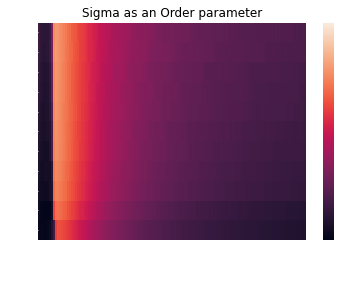

In [10]:
ax_sigma = sns.heatmap(sigma_table, annot=False, vmax = 1)
ax_sigma.set_title('Sigma as an Order parameter')
ax_sigma.invert_yaxis()

In [11]:
fig = ax_sigma.get_figure()
fig.savefig(os.path.join(target_path, 'sigma_phase_space.png'), dpi = 1000)

# Amin Saman Parameter

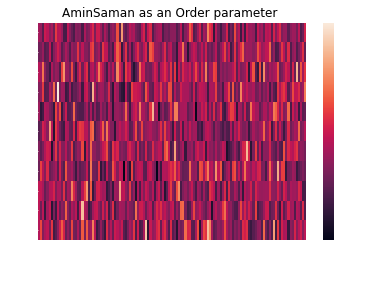

In [12]:
if neuron_model in ['Rotational','Non_repulsive_rotational']:
    amin_saman_param_table = dict_to_dataframe(amin_saman_param_glossary_dict)
    ax_field_period = sns.heatmap(amin_saman_param_table)
    ax_field_period.set_title('AminSaman as an Order parameter ')
    fig = ax_field_period.get_figure()
    fig.savefig(os.path.join(target_path, 'amin_saman_phase_space.png'))

# Field period dataframe

In [13]:
field_period_table = dict_to_dataframe(field_period_glossary_dict)
field_period_table

connectivity,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
delay,,,,,,,,,,,,,,,,,,,,,
0.3,0.514400,0.793651,0.934579,0.641026,0.694444,0.746269,0.793651,0.793651,0.833333,0.869565,...,2.325581,1.176471,2.325581,2.380952,2.380952,2.380952,2.439024,2.439024,2.439024,2.439024
0.5,0.465116,0.526316,0.934579,1.086957,1.250000,1.204819,1.204819,1.219512,1.282051,1.333333,...,3.703704,3.703704,3.703704,3.703704,3.703704,3.703704,3.703704,3.703704,3.846154,1.886792
0.7,0.465116,0.526316,0.584795,0.641026,1.694915,1.639344,1.639344,1.639344,1.724138,1.818182,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
0.9,0.465116,0.526316,0.584795,0.641026,0.694444,2.040816,2.000000,2.083333,2.173913,2.272727,...,6.250000,2.083333,3.125000,3.125000,3.125000,2.127660,2.127660,6.666667,6.666667,6.666667
1.1,0.465116,0.526316,0.584795,2.564103,2.439024,2.439024,2.380952,2.500000,2.631579,2.702703,...,7.142857,7.142857,7.142857,7.142857,7.142857,3.846154,3.846154,7.142857,3.846154,3.846154
1.3,100.000000,0.526316,0.584795,2.941176,2.857143,2.857143,2.777778,2.941176,3.030303,3.225806,...,9.090909,9.090909,9.090909,9.090909,9.090909,8.333333,8.333333,8.333333,8.333333,8.333333
1.5,100.000000,0.526316,3.703704,0.641026,3.225806,3.225806,3.225806,3.333333,3.448276,3.571429,...,5.000000,5.000000,5.000000,11.111111,11.111111,3.333333,11.111111,3.333333,11.111111,10.000000
1.7,100.000000,0.526316,4.166667,3.846154,3.703704,3.571429,3.571429,3.703704,3.846154,4.166667,...,5.555556,5.555556,5.555556,5.555556,12.500000,12.500000,12.500000,12.500000,12.500000,12.500000
1.9,100.000000,6.666667,4.545455,4.166667,4.166667,4.000000,4.000000,4.166667,4.347826,4.545455,...,6.250000,6.250000,6.250000,6.250000,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714


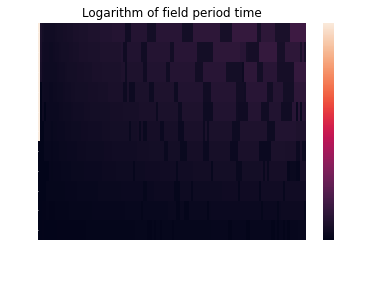

In [14]:
# ax_field_period = sns.heatmap(np.log(field_period_table.abs()), annot=False, vmax = 2, vmin = -2)
ax_field_period = sns.heatmap(field_period_table.abs(), annot=False)
ax_field_period.set_title('Logarithm of field period time')
ax_field_period.invert_yaxis()

In [15]:
fig = ax_field_period.get_figure()
fig.savefig(os.path.join(target_path, 'field_period_phase_space.png'))

In [16]:
max_intensity_table = dict_to_dataframe(field_max_intensity_mod_glossary_dict)
max_intensity_table

connectivity,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
delay,,,,,,,,,,,,,,,,,,,,,
0.3,244.972229,237.572659,231.766155,200.595743,233.969663,348.117088,741.501362,854.769595,4265.090286,4237.488215,...,600.273532,581.809454,555.044256,731.403318,675.077947,629.329931,675.235228,631.581262,657.169004,690.773883
0.5,250.928301,232.289391,200.129545,207.945721,225.810084,270.332978,510.037808,4215.999110,5004.711902,4050.561890,...,824.797674,850.647223,839.047896,837.184596,762.131056,770.366775,763.536952,733.916031,806.588573,658.853532
0.7,235.454157,295.492269,284.523803,230.847977,213.222797,321.498024,512.902805,4429.096448,5022.908127,3478.104491,...,631.166469,591.414775,682.487294,702.319861,695.516463,733.047653,782.787108,758.572724,696.861927,664.737604
0.9,256.571903,234.462694,256.215041,372.736112,369.348093,313.339051,843.793744,3864.883369,5178.869360,4741.948120,...,597.187175,591.914532,586.672326,585.729523,606.687119,577.435035,580.745150,610.618481,629.285417,634.117846
1.1,239.728377,284.641900,189.630819,193.248709,269.988336,463.341511,1161.094606,4837.796388,4070.656830,4808.454568,...,602.948791,604.137645,594.511333,563.402136,568.157641,568.551253,656.888161,546.601663,632.393089,554.590490
1.3,255.587980,278.172203,295.144761,230.726526,303.619327,467.606772,1302.884175,3786.088158,5230.118703,3541.095193,...,698.318823,653.471362,662.431058,649.515304,627.892412,687.007603,667.613873,654.675087,677.473413,690.902796
1.5,292.204875,231.976280,225.992603,305.519270,348.731207,586.688673,1600.770497,5240.818174,4838.694524,3546.091618,...,732.889491,772.149434,730.664964,633.341382,630.817924,581.114177,618.593606,595.466103,613.575680,631.784311
1.7,330.037758,290.667380,253.478516,284.444597,377.509016,607.387506,1849.350100,4821.672496,3641.089886,3840.955056,...,756.622784,717.899547,735.026722,735.465358,665.263236,617.749676,657.101248,671.986163,676.738150,657.583681
1.9,366.283948,282.920871,279.297331,319.499126,411.758333,707.677516,2138.737792,5356.958913,5445.917967,5327.353634,...,812.170960,784.041368,729.509498,707.852046,628.663081,642.504008,642.516234,638.019141,636.025894,626.050236


<IPython.core.display.Javascript object>


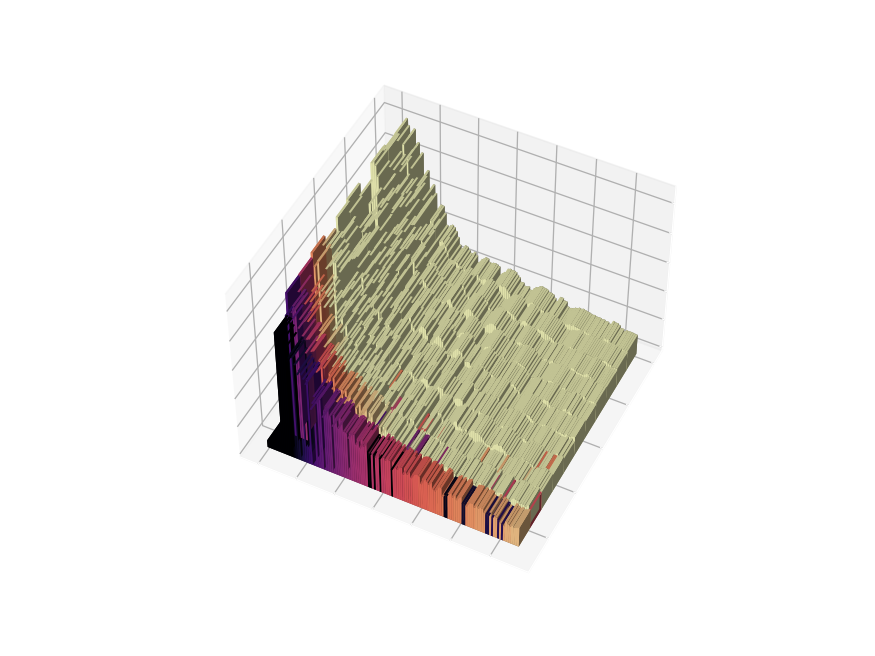

In [17]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

d_arr = max_intensity_table.index
g_arr = max_intensity_table.columns
bars_pos = np.array([np.tile(g_arr, len(d_arr)), np.repeat(d_arr, len(g_arr)), [0]*(len(d_arr)*len(g_arr))])

dd_arr = d_arr[1] - d_arr[0]
dg_arr = g_arr[1] - g_arr[0]

dmax_intensity = max_intensity_table.to_numpy().flatten()

cmap = plt.cm.get_cmap('magma') # Get desired colormap - you can change this!
period_arr = field_period_table.to_numpy().flatten()
max_height = np.max(period_arr)   # get range of colorbars so we can normalize
min_height = np.min(period_arr)
# scale each z to [0,1], and get their rgb values
rgba = [cmap( np.log( k ) ) for k in period_arr] 


fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(bars_pos[0], bars_pos[1], bars_pos[2], dg_arr, dd_arr, dmax_intensity, color=rgba)